# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [38]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [39]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 635


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [48]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"
# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&units=metric&q=" + city

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | laguna
Processing Record 2 of Set 1 | georgetown
Processing Record 3 of Set 1 | roald
Processing Record 4 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 5 of Set 1 | inhambane
Processing Record 6 of Set 1 | umzimvubu
City not found. Skipping...
Processing Record 7 of Set 1 | rikitea
Processing Record 8 of Set 1 | turukhansk
Processing Record 9 of Set 1 | ginir
Processing Record 10 of Set 1 | busselton
Processing Record 11 of Set 1 | vorobyevka
Processing Record 12 of Set 1 | parrita
Processing Record 13 of Set 1 | new norfolk
Processing Record 14 of Set 1 | yellowknife
Processing Record 15 of Set 1 | arraial do cabo
Processing Record 16 of Set 1 | kyrylivka
Processing Record 17 of Set 1 | lerwick
Processing Record 18 of Set 1 | punta arenas
Processing Record 19 of Set 1 | tumannyy
City not found. Skipping...
Processing Record 20 of Set 1 | skegness
Processing Record 21 

In [49]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          580
Lat           580
Lng           580
Max Temp      580
Humidity      580
Cloudiness    580
Wind Speed    580
Country       580
Date          580
dtype: int64

In [50]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,laguna,38.4210,-121.4238,18.99,58,100,5.14,US,1675546926
1,georgetown,5.4112,100.3354,25.96,88,20,3.09,MY,1675546926
2,roald,62.5833,6.1333,6.08,70,75,7.72,NO,1675546545
3,inhambane,-23.8650,35.3833,24.36,86,9,3.79,MZ,1675546920
4,rikitea,-23.1203,-134.9692,26.08,74,2,6.17,PF,1675546547


In [51]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [52]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,laguna,38.4210,-121.4238,18.99,58,100,5.14,US,1675546926
1,georgetown,5.4112,100.3354,25.96,88,20,3.09,MY,1675546926
2,roald,62.5833,6.1333,6.08,70,75,7.72,NO,1675546545
3,inhambane,-23.8650,35.3833,24.36,86,9,3.79,MZ,1675546920
4,rikitea,-23.1203,-134.9692,26.08,74,2,6.17,PF,1675546547


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

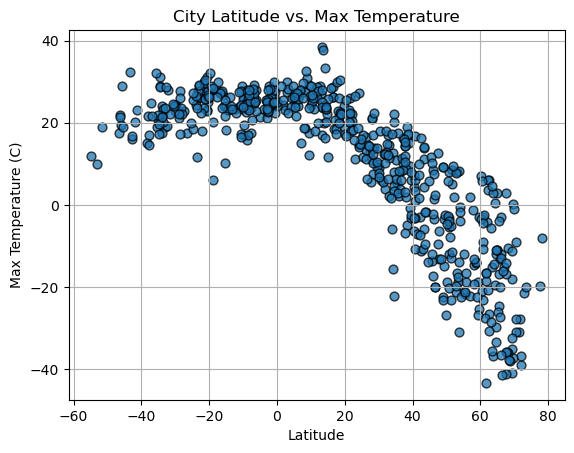

In [72]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'],city_data_df['Max Temp'], marker="o", edgecolors="black", s=city_lat, alpha=0.75)


# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.title('City Latitude vs. Max Temperature')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

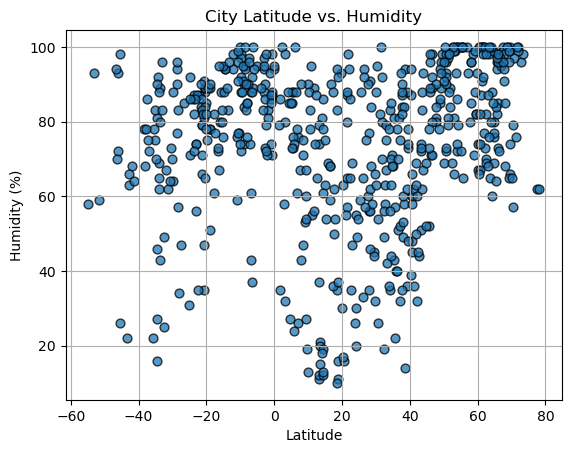

In [74]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'],city_data_df['Humidity'], marker="o", edgecolors="black", s=city_lat, alpha=0.75)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('City Latitude vs. Humidity')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

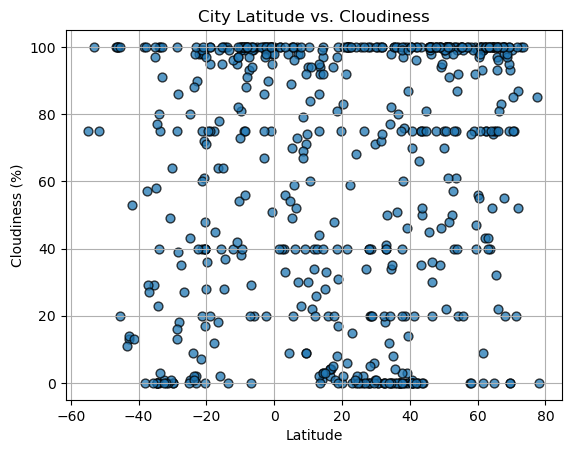

In [75]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'],city_data_df['Cloudiness'], marker="o", edgecolors="black", s=city_lat, alpha=0.75)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('City Latitude vs. Cloudiness')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

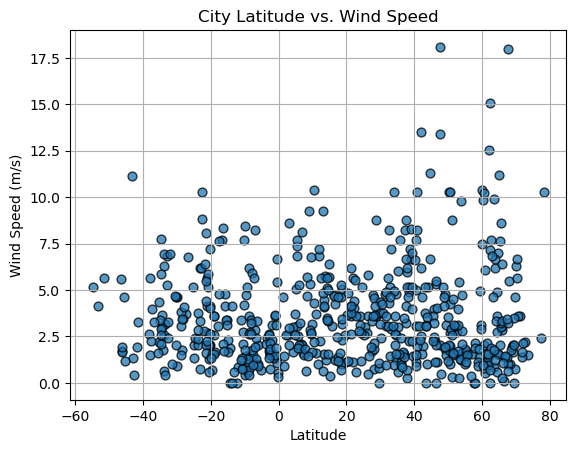

In [76]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'],city_data_df['Wind Speed'], marker="o", edgecolors="black", s=city_lat, alpha=0.75)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.title('City Latitude vs. Wind Speed')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [151]:
# Define a function to create Linear Regression plots


In [83]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat']>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,laguna,38.4210,-121.4238,18.99,58,100,5.14,US,1675546926
1,georgetown,5.4112,100.3354,25.96,88,20,3.09,MY,1675546926
2,roald,62.5833,6.1333,6.08,70,75,7.72,NO,1675546545
5,turukhansk,65.8167,87.9833,-13.28,96,97,2.84,RU,1675546616
6,ginir,7.1333,40.7000,15.05,26,30,1.61,ET,1675546930


In [84]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,inhambane,-23.8650,35.3833,24.36,86,9,3.79,MZ,1675546920
4,rikitea,-23.1203,-134.9692,26.08,74,2,6.17,PF,1675546547
7,busselton,-33.6500,115.3333,22.63,43,75,3.19,AU,1675546651
10,new norfolk,-42.7826,147.0587,15.95,63,13,0.45,AU,1675546660
12,arraial do cabo,-22.9661,-42.0278,28.98,74,0,6.17,BR,1675546933


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.7423598877959922


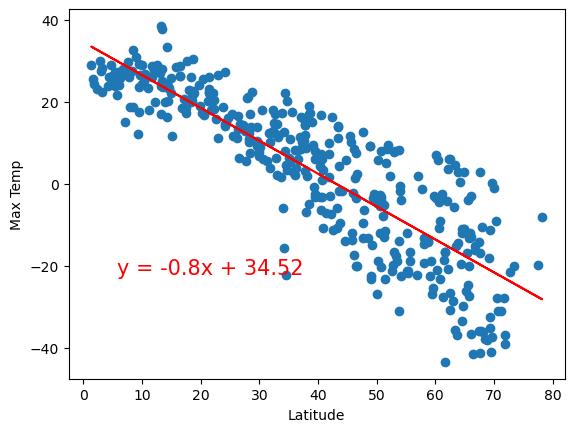

In [127]:
# Linear regression on Northern Hemisphere
x_1 = northern_hemi_df['Lat']
y_1 = northern_hemi_df['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_1, y_1)
regress_values = x_1 * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_1,y_1)
plt.plot(x_1,regress_values,"r-")
plt.annotate(line_eq,(5.8,-22),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.08678953497619063


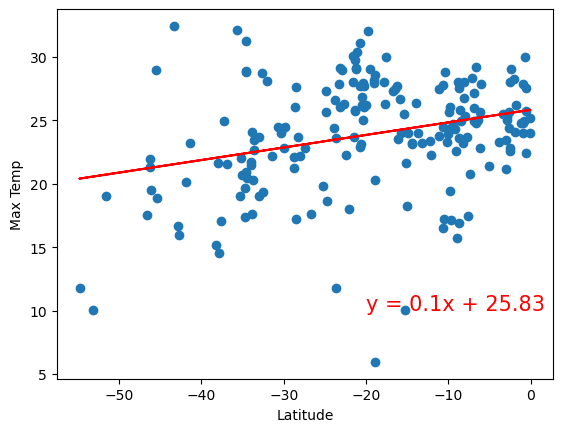

In [125]:
# Linear regression on Southern Hemisphere
x_2 = southern_hemi_df['Lat']
y_2 = southern_hemi_df['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_2, y_2)
regress_values = x_2 * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_2,y_2)
plt.plot(x_2,regress_values,"r-")
plt.annotate(line_eq,(-20,10),fontsize=15,color="red")

plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-squared is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** In the plots above, the linear regression of maximum temperature versus latitude in Northern and Southern hemispheres are shown. In Northern hemisphere, the linear coefficient is negative, which indicates that as the latitude goes up, the maximum temperature goes down. On the other hand, the plot for Southern hemisphere has a positive coefficient, which indicates that as the latitude goes up, the maximum temperature goes up as well. However, the positive coeffienct of southern hemisphere linear regression, 0.1, is close to zero, which means the relationships between latitude and maximum temperature is weak.

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.1954923082149926


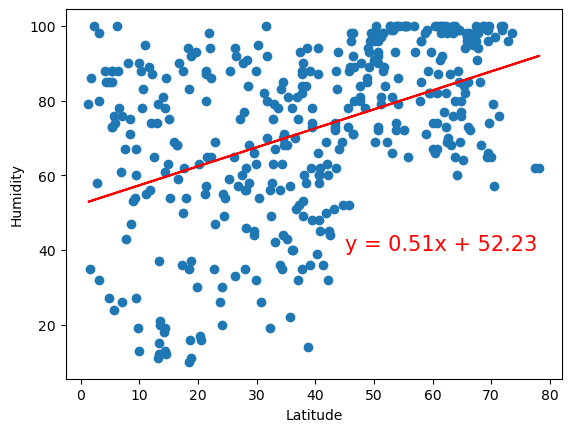

In [152]:
# Northern Hemisphere
x_value = northern_hemi_df['Lat']
y_value = northern_hemi_df['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
regress_values = x_value * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_value,y_value)
plt.plot(x_value,regress_values,"r-")
plt.annotate(line_eq,(45,40),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.15204773794440593


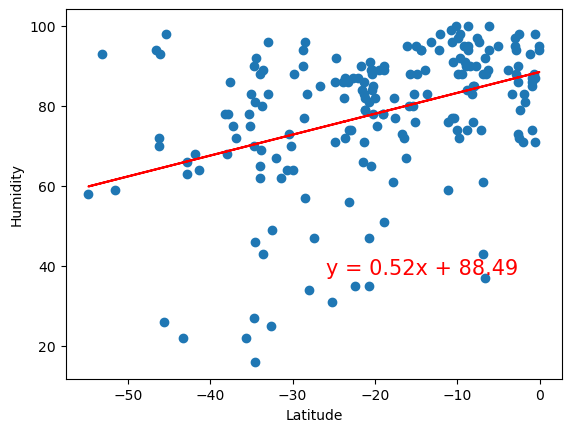

In [153]:
# Southern Hemisphere
x_value = southern_hemi_df['Lat']
y_value = southern_hemi_df['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
regress_values = x_value * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_value,y_value)
plt.plot(x_value,regress_values,"r-")
plt.annotate(line_eq,(-26,38),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-squared is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** In the plots above, the linear regression of humidity versus latitude in Northern and Southern hemispheres are shown. In both Northern and Southern hemisphere, the linear coefficients are positive and very similar. As latitude goes up, humidity increases, whether it's in Northern or Southern Hemisphere.

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.06944242786391784


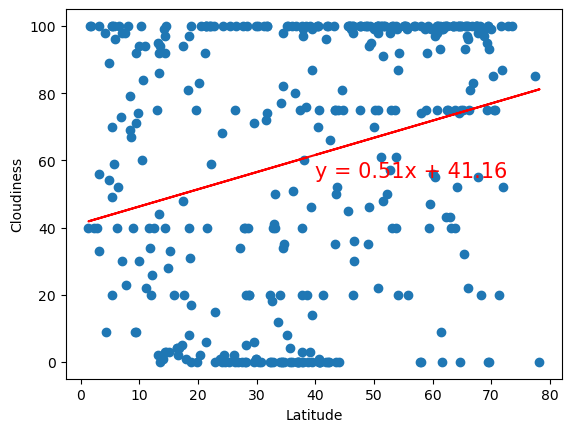

In [132]:
# Northern Hemisphere
x_value = northern_hemi_df['Lat']
y_value = northern_hemi_df['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
regress_values = x_value * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_value,y_value)
plt.plot(x_value,regress_values,"r-")
plt.annotate(line_eq,(40,55),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.13044548844707393


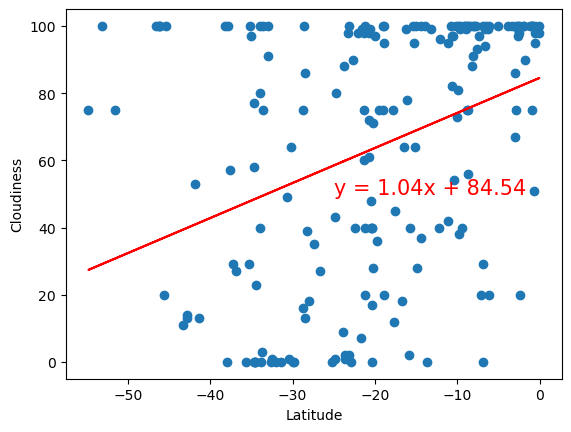

In [138]:
# Southern Hemisphere
x_value = southern_hemi_df['Lat']
y_value = southern_hemi_df['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
regress_values = x_value * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_value,y_value)
plt.plot(x_value,regress_values,"r-")
plt.annotate(line_eq,(-25,50),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-squared is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** In the plots above, the linear regression of cloudiness versus latitude in Northern and Southern hemispheres are shown. In both Northern and Southern hemisphere, the linear coefficients are positive, which means as latitude goes up, cloudiness increases. However, the linear regression line doesn't seem representative for the dots in these two plots. As shown by the dots on scatterplots, cloudiness is evenly spread out throughout the range of latitude.

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 5.409704655665583e-05


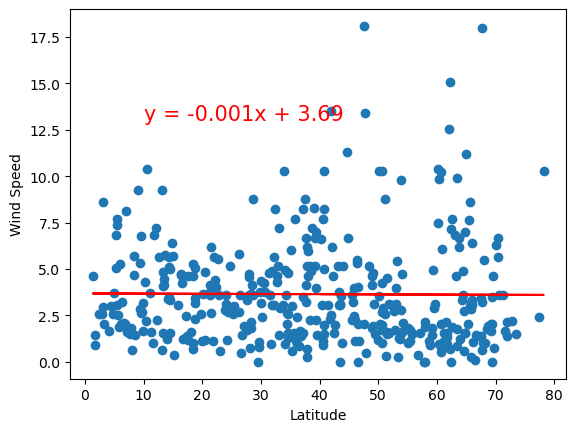

In [150]:
# Northern Hemisphere
x_value = northern_hemi_df['Lat']
y_value = northern_hemi_df['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
regress_values = x_value * slope + intercept
line_eq = "y = " + str(round(slope,4)) + "x + " + str(round(intercept,2))

plt.scatter(x_value,y_value)
plt.plot(x_value,regress_values,"r-")
plt.annotate(line_eq,(10,13),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.04303480271706806


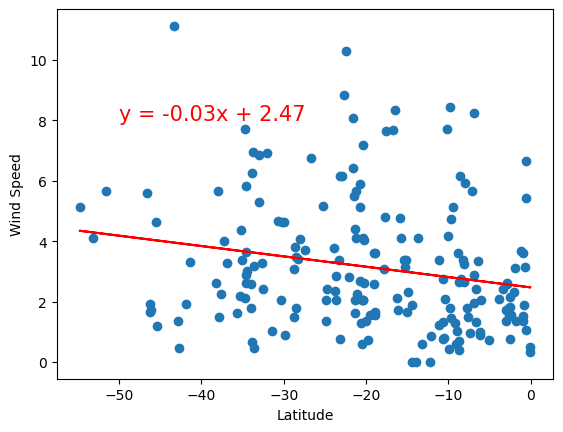

In [149]:
# Southern Hemisphere
x_value = southern_hemi_df['Lat']
y_value = southern_hemi_df['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
regress_values = x_value * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_value,y_value)
plt.plot(x_value,regress_values,"r-")
plt.annotate(line_eq,(-50,8),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-squared is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** In the plots above, the linear regression of wind speed versus latitude in Northern and Southern hemispheres are shown. In both Northern and Southern hemisphere, the linear coefficients are negative, which means as latitude goes up, wind speed decreases. However, the coefficients are quit close to zero in both hemispheres, so the wind speed does not seem to be affected by the latitude very much.